# 潮汐点分析

## Data Load

In [1]:
import pandas as pd
import numpy as np
import folium
import os
from tqdm import tqdm
import codecs

In [2]:
stances = pd.read_csv('gxdc_stances.csv')
orders = pd.read_csv('gxdc_dd.csv')

In [4]:
bike_order = orders.sort_values(['BICYCLE_ID', 'UPDATE_TIME'])

In [11]:
bike_order['BICYCLE_ID'].unique().shape

(53630,)

In [15]:
close = bike_order[bike_order['LOCK_STATUS'] == 1]

In [17]:
close

,BICYCLE_ID,LATITUDE,LONGITUDE,LOCK_STATUS,UPDATE_TIME
41110,0000ff105fd5f9099b866bccd157dc50,24.496578,118.142543,1,2020/12/21 6:50:18
65945,0000ff105fd5f9099b866bccd157dc50,24.481350,118.167496,1,2020/12/21 8:44:34
118909,0000ff105fd5f9099b866bccd157dc50,24.494801,118.147564,1,2020/12/22 8:14:57
96851,0000ff105fd5f9099b866bccd157dc50,24.491365,118.149005,1,2020/12/22 8:23:24
155763,0000ff105fd5f9099b866bccd157dc50,24.493236,118.141339,1,2020/12/22 8:54:24
...,...,...,...,...,...
309331,fffd0d92511854adf6fb89064d4e5540,24.530825,118.148958,1,2020/12/25 9:18:52
372192,fffd0d92511854adf6fb89064d4e5540,24.496363,118.141839,1,2020/12/25 9:53:30
560743,ffff71c605a3ef383bc8b071b924fed0,24.438500,118.086365,1,2020/12/21 8:06:17
531173,ffffa4a7c6cd6cda114fdb0e6f391038,24.461162,118.067411,1,2020/12/21 8:47:35


In [16]:
import matplotlib.pyplot as plt

In [23]:
close['UPDATE_TIME'].min(), close['UPDATE_TIME'].max()

('2020/12/21 6:00:03', '2020/12/25 9:59:59')

In [26]:
close[(close['UPDATE_TIME'] < '2020/12/21 6:10:00')]

,BICYCLE_ID,LATITUDE,LONGITUDE,LOCK_STATUS,UPDATE_TIME
56916,013415294531dff323fa4b60104102ab,24.512000,118.154580,1,2020/12/21 6:00:06
28179,018f27bd4dcf6a6a321dfb60853f1e83,24.487512,118.180839,1,2020/12/21 6:08:50
57163,0292808e1a466e1ebedca43420263001,24.555652,118.120002,1,2020/12/21 6:06:16
28345,0460500ca4c1ae4409eb1629bf0ff12d,24.486082,118.192024,1,2020/12/21 6:07:41
28368,05b973ede3c920778387f5ab95d51257,24.511037,118.134425,1,2020/12/21 6:07:50
...,...,...,...,...,...
57221,f79ef8c84afc610e802d9b466c8c07a2,24.483340,118.152699,1,2020/12/21 6:05:43
28375,f89fde0c0ec2e97270e11e0c47b17062,24.533094,118.151807,1,2020/12/21 6:07:56
57077,fb95ef63cd8f5e9b218a7c81aac371a4,24.515143,118.122375,1,2020/12/21 6:04:51
28340,ff8b367c27a5957039c5a1f06ba6c989,24.474682,118.149092,1,2020/12/21 6:07:35


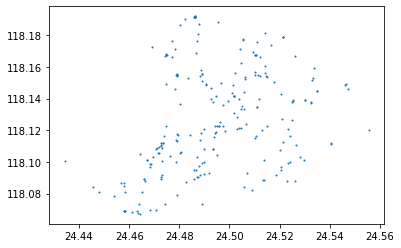

In [27]:



plt.scatter(close[(close['UPDATE_TIME'] < '2020/12/21 6:10:00')]['LATITUDE'], close[(close['UPDATE_TIME'] < '2020/12/21 6:10:00')]['LONGITUDE'], s = 1)

In [30]:
close['UPDATE_TIME'].iloc[20]  + '10'

'2020/12/24 7:00:0410'

In [41]:
pd.Timestamp(close['UPDATE_TIME'].iloc[20]) + pd.Timedelta(minutes = 10)
# - pd.Timestamp(close['UPDATE_TIME'].iloc[10])

Timestamp('2020-12-24 07:10:04')

In [34]:
pd.Timedelta(seconds = 10)

Timedelta('0 days 00:00:10')